In [1]:
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

from matplotlib import patches
import random

mpl.use('pdf')

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1)
plt.rc('lines', markersize=5)
plt.rc('patch', linewidth=1.5)

plt.rc('savefig', dpi=300)


plt.rc('xtick', bottom=False)
plt.rc('xtick', top=False)
plt.rc('xtick', labeltop=False)
plt.rc('xtick', labelbottom=False)


plt.rc('ytick', right=False)
plt.rc('ytick', left=False)
plt.rc('ytick', labelsize=0)
plt.rc('ytick', labelleft=False)
plt.rc('ytick', labelright=False)


%load_ext autoreload
%autoreload 2

In [2]:

def plotellipse_and_points(ax, a, b, X, Y, theta=0, **kwargs):
    #ax.set_axis_off()
    ax.scatter(X, Y, **kwargs)
    e = patches.Ellipse(xy=[0, 0], width=2*a, height=2*b,
                         angle=180 *theta/pi, fill=False)
    ax.add_artist(e)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 2)

def plotellipse_fitpoints(ax, a, b, X, Y, theta=0, pltpoints=True, **kwargs):
    xc, yc = get_center(a, b, X, Y, theta)
    e = patches.Ellipse(xy=[xc, yc], width=2*a, height=2*b,
                         angle=180 * theta/pi, fill=False)
    if pltpoints:
        ax.scatter(X, Y, **kwargs)

    ax.add_patch(e)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 2)

    

In [3]:
def rot(x, y, theta):
    return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)

def distsq(X, Y):
    return (X[0]-X[1])**2 + (Y[0]-Y[1])**2

def get_center(a, b, X, Y, theta):
    for i in range(len(X)):
        X[i], Y[i] = rot(X[i], Y[i], -theta)

    m = (Y[1]-Y[0])/(X[1]-X[0])
    D = distsq(X, Y)
    A = 4*a**2*b**2 + 4*a**2*b**2*m**2
    B = a**2*m**2 + b**2
    
    c = sqrt((B*A - D*B**2)/A)
    
    x1 = (-a**2*m*c - a*b*sqrt(a**2*m**2+b**2-c**2))/(a**2*m**2 + b**2)
    x2 = (-a**2*m*c + a*b*sqrt(a**2*m**2+b**2-c**2))/(a**2*m**2 + b**2)
    if x1 > x2:
        x2, x1 = x1, x2
    
    y2 = x2 * m + c
    y1 = x1 * m + c
    
    xc, yc = 0, 0
    
    if X[0] < X[1]:
        xc = -x1+X[0]
        yc = -y1+Y[0]
    else:
        xc = -x2+X[0]
        yc = -y2+Y[0]
    
    xc, yc = rot(xc,yc, theta)
    
    for i in range(len(X)):
        X[i], Y[i] = rot(X[i], Y[i], theta)
        
    return xc, yc    

In [4]:
a = 1.7
b = 1
X = [-0.5, 0.5,-0.3,0.1,0.9]
Y = [0.6, 1, 0,-0.1, -0.2]
#Y = [random.random()*2 - 1 for i in range(3)]
fig = plt.figure(figsize=set_size(455))
ax = fig.add_subplot(121, aspect='equal')
plotellipse_and_points(ax, a, b, X, Y, 0.5, lw=0.4)

#ax.scatter([-2.5, 2.8], [1, 1])

plt.show()

#fig = plt.figure()
ax = fig.add_subplot(122, aspect='equal')
plotellipse_fitpoints(ax, a, b, X, Y, 0.5, lw=0.4)
plt.savefig('ellipse-2-points.pdf', format='pdf', bbox_inches='tight')
#plt.show()

NameError: name 'set_size' is not defined

In [5]:
a = 1.7
b = 1
X = [-1, 1.3]
Y = [0.2, 0.2]
fig = plt.figure(figsize=set_size(355))
#ax = fig.add_subplot(121, aspect='equal')
#plotellipse_fitpoints(ax, a, b, X, Y, 0, True)
#ax.plot([], [], label=r'$E(q, \frac{\pi}{4})$', c='black')
#ax.legend(frameon=False, loc='upper left')

ax = fig.add_subplot(111, aspect='equal')
plotellipse_fitpoints(ax, a, b, X, Y, pi/4, True, lw=2)
ax.plot([], [], label=r'$E(q_1,\pi/4)$', lw=2, c='black')
ax.plot([], [], label=r'$E(q_2,\pi/2)$', lw=2, c='black', linestyle='--')

ax.legend(frameon=False, loc='upper left')

e = patches.Ellipse(xy=[0, 0], width=2*a, height=2*b,
                         angle=90, fill=False, linestyle='--')
ax.add_artist(e)

#plotellipse_fitpoints(ax, a, b, X, Y, 0, False)
plt.savefig('feasible-angle.pdf', format='pdf', bbox_inches='tight')
plt.show()

NameError: name 'set_size' is not defined

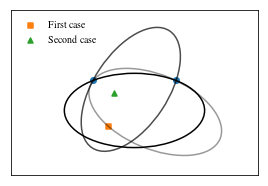

In [333]:
a = 1.7
b = 0.9
X = [-1, 1]
Y = [0.3, 0.3]
fig = plt.figure(figsize=set_size(355))
#ax = fig.add_subplot(121, aspect='equal')
#plotellipse_fitpoints(ax, a, b, X, Y, 0, True)
#ax.plot([], [], label=r'$E(q, \frac{\pi}{4})$', c='black')
#ax.legend(frameon=False, loc='upper left')

ax = fig.add_subplot(111, aspect='equal')
plotellipse_fitpoints(ax, a, b, X, Y, 0, True, lw=2)

xc, yc = get_center(a, b, X, Y, pi/4+0.22)
e = patches.Ellipse(xy=[xc, yc], width=2*a, height=2*b, angle=180/pi*(pi/4+0.2), fill=False, alpha=.7)
ax.add_artist(e)


#xc, yc = get_center(a, b, X, Y, pi/4+0.1)
#e = patches.Ellipse(xy=[xc, yc], width=2*a, height=2*b, angle=180/pi*(pi/4+0.1), fill=False, alpha=.6)
#ax.add_artist(e)

xc, yc = get_center(a, b, X, Y, -pi/8)
e = patches.Ellipse(xy=[xc, yc], width=2*a, height=2*b, angle=-180/pi*(pi/8), fill=False, alpha=.4)
ax.add_artist(e)

d = sqrt(distsq(X, Y))
c1 = patches.Circle((X[0], Y[0]),d, alpha=.1, color='r')
c2 = patches.Circle((X[1], Y[1]),d, alpha=.1)
#ax.add_artist(c1)
#ax.add_artist(c2)

ax.scatter([-.65],[-0.8], marker='s', label="First case")
ax.scatter([-0.5], [0], marker='^', label="Second case")


#ax.plot([], [], label=r'$E(q_1,\pi/4)$', lw=2, c='black')
#ax.plot([], [], label=r'$E(q_2,\pi/2)$', lw=2, c='black', linestyle='--')

ax.legend(frameon=False, loc='upper left')



#e = patches.Ellipse(xy=[0, 0], width=2*a, height=2*b,
#                         angle=0, fill=False, linestyle=':')
#ax.add_artist(e)

#plotellipse_fitpoints(ax, a, b, X, Y, 0, False)
plt.savefig('lema-3-points.pdf', format='pdf', bbox_inches='tight')
#plt.show()

In [251]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim
